# Syrtis Validation
# Validation of Convective Transfer versus Ansys Fluent

One major uncertainty in Syrtis is the assumption that simple convective heat transfer correlations can be used to model the more complex geometries used - particularly, a cylinder in close proximity to the ground plane. This is validated against Ansys Fluent CFD simulation to determine the accuracy of Syrtis.

In [1]:
from syrtis import *
from syrtis.configuration import Configuration
from syrtis.solver import Solver
from syrtis.material import Solid, ConstrainedIdealGas
from syrtis.habitat import Habitat
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Materials definitions
# The absorbivity of perlite and air are assumed as 0.5 but are not required
aluminium = Solid("Aluminium", 247, 2700, 900, absorb=0.15, emit=0.04)
plastic = Solid("Generic plastic", 10, 1300, 1420,  absorb=0.89, emit=0.84)

internal_air = ConstrainedIdealGas("STP Air", 101325, 29, 0.71, 17.9e-6, 1010, 0.0252)
martian_air = ConstrainedIdealGas("Martian ambient pressure CO2", 580, 44, 0.71, 10.9e-6, 749, 0.0153)

mount_sharp = Configuration("Curiosity landing area, Mount Sharp",
 "constant temperature", 210, 0.2, 0.29, 210, 580, 5, "cross", 90, 90, 590, T_habitat=293)

In [3]:
test_horizontal = Habitat("horizontal", 10, "hemisphere")
test_horizontal.create_static_shell(internal_air, 2.9)
test_horizontal.create_static_shell(aluminium, 0.1)

test_horizontal.verify_geometry()

In [4]:
Q_cylinder = test_horizontal.convective_loss_cylinder_cross(martian_air, 
                                                                5,
                                                                210,
                                                                270)
Q_endcap = test_horizontal.convective_loss_endcap_cross(martian_air, 
                                                                5,
                                                                210,
                                                                270)
print(Q_cylinder, Q_endcap)
half_habitat_loss = (Q_cylinder + Q_endcap) / 2

3195.1373732047823 1516.8167864922232


In [5]:
# Ansys Fluent data
clearances = [3, 2.5, 2, 1.5, 1, 0.8, 0.6, 0.5, 0.4, 0.3, 0.2, 0.15, 0.1, 0.05, 0.001]
ansys_losses = [2256.4, 2288.2, 2294.7, 2340.7, 2388.1, 2428.0, 2463.5, 2509.0, 2501.5, 2530.7, 2594.1, 2510.8, 2449.5, 2306.1, 2154.2]

Text(0.5, 1.0, 'Validation of Syrtis convection model vs Ansys Fluent')

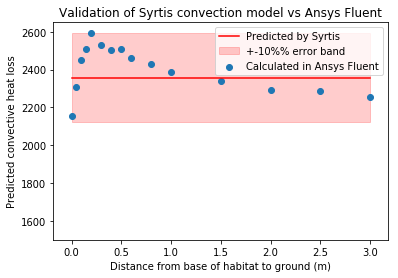

In [6]:
plt.plot([0.001, 3], [half_habitat_loss, half_habitat_loss], color="r", label="Predicted by Syrtis")
plt.fill_between([0.001, 3], y1=[half_habitat_loss*0.9, half_habitat_loss*0.9], 
y2=[half_habitat_loss*1.1, half_habitat_loss*1.1], label="+-10%% error band", color="r", alpha=0.2)

plt.scatter(clearances, ansys_losses, label="Calculated in Ansys Fluent")
plt.legend()
plt.ylim(1500, 2650)
plt.xlabel("Distance from base of habitat to ground (m)")
plt.ylabel("Predicted convective heat loss")
plt.title("Validation of Syrtis convection model vs Ansys Fluent")
